# Nickel-56 masses of normal Type II supernovae

## 1) Background

Light curves of Type II supernovae (SNe II) are characterized by a phase called radioactive tail. In this phase, the energy sources are the gamma-rays and positrons produced by the radioactive decay of the unstable cobalt isotope Co-56 (daughter of the unstable nickel isotope Ni-56) into the stable iron isotope Fe-56. The luminosity during the radioactive tail is, therefore, a good estimate of the Ni-56 mass ejected in the explosion.

In Rodríguez et al. (2020, submitted to MNRAS) I developed a routine to estimate Ni-56 masses of normal SNe II, called **SNII_nickel**. The routine computes luminosities using the photometry in one optical band (VrRiI) along with the bolometric correction (BC) technique. This routine also detects and corrects for gamma-ray leakage from the ejecta assuming the analytical deposition function of [Jeffery 1999](https://ui.adsabs.harvard.edu/abs/1999astro.ph..7015J/abstract).

For any question, email me at olrodrig@gmail.com

**If you use the SNII_nickel code in your work, please cite Rodríguez et al. (2020, submitted to MNRAS).**

## 2) Installation

The SNII_nickel code does not require installation, but it has dependencies that must be satisfied.

### 2.1) Dependencies

The SNII_nickel code is written on Python 3, so you have to install it (in Ubuntu: apt install Python3). In addition, you need to install numpy and matplotlib. To install them with pip3: `pip3 install numpy matplotlib`.

### 2.2) Loading SNII_nickel

Assuming that the SNII_nickel Python files are in the directory `/path/tofiles`, you have to include the following lines in your code

`import sys
sys.path.append(/path/tofiles)
from SNII_nickel import Nickel_mass`

## 3) Description

The unique class in SNII_nickel is Nickel_mass.

`Nickel_mass(band, t_mag, mag, err_mag, properties, tmin=95.0, tmax=320.0, RxG=99, Rxh=99, apply_kcor=True, verbose=True)`

### Parameters:

- **band: string.** Band used to obtain the photometric data. Valid bands are "V", "r", "R", "i", and "I".
- **t_mag: array-like.** Epochs of the photometric data.
- **mag: array-like.** Apparent photometry.
- **err_mag: array-like.** One-sigma error in the apparent photometry.
- **properties: dictionary.** Properties of the input SN. Keys are: "z_helio" for the heliocentric redshift, "mu" ("err_mu"), "EGBV" ("err_EGBV"), "EhBV" ("err_EhBV"), and "texp" ("err_texp") for the distance modulus, Galactic color excess, host galaxy color excess, and explosion epoch (and their one-sigma errors), respectively.
- **tmin: float (default: 95.0).** Minimum time (since the explosion) value to use to compute Ni-56 mass.
- **tmax: float (default: 320.0).** Maximum time (since the explosion) value to use to computeNi-56 mass.
- **RxG: float, optional (default: 99).** Total-to-selective Galactic extinction ratio for the input band. If RxG=99, then the code assumes the default RxG value.
- **Rxh: float, optional (default: 99).** Total-to-selective host-galaxy extinction ratio for the input band. If Rxh=99, then the code assumes the default Rxh value.
- **apply_kcor: bool, optional (default: True).** Whether or not correct photometry for the K-correction implemented in the code.
- **verbose: bool, optional (default: True).** Whether or not show output messages.

### Attributes:

- **MNi: float.** Ni-56 mass in solar mass units.
- **eMNi: float.** One-sigma error on MNi.
- **logMNi: float.** Ni-56 mass (in solar mass units) in log scale.
- **elogMNi: float.** One-sigma error on logMNi.

### Methods:

`plot(panels, sn="", figure_name="")`

Plot apparent BVI light curves, the V-I versus B-V C3, and the Eh(B-V) estimates as a function of time.

**Parameter:**

* **panels: string.** Panels to be displayed, with a maximum of two. Available panels are: "lc" for the input light curve, "lc-zoom" for the points of the light curve selected to compute the Ni-56 mass estimates, "fdep=1" for the Ni-56 estimates without including a deposition function correction, and "fdep<1" for the Ni-56 estimates corrected for the deposition function. To display two panels, their names have to be contatenated with "," (e.g. "fdep=1,fdep<1").
* **sn: string (default:"").** SN name.
* **figure_name: string (default:"").** Name of the output figure (e.g. "MNi.pdf"). If figure_name="", then the figure is not saved.

## 4) Example

The SNII_nickel Python files are in the folder called `src`, which is in the same parent directory of the folder with this tutorial. Then, to load the class `Nickel_mass`, we execute

In [1]:
import sys
sys.path.append('../src')
from SNII_nickel import Nickel_mass

To make this tutorial easier to follow, I created the routine `read_photometry` (which is not part of the SNII_nickel code) to read the example photometry

In [2]:
from read_photometry import read_photometry

For this example, we will use the apparent I-band photometry of the normal SN II 2004A. First, we set its properties (heliocentric redshift, distance modulus, Galactic color excess, host galaxy color excess, and explosion time)

In [3]:
properties_04A = {}
properties_04A['z_helio'] = 0.0028
properties_04A['mu']  , properties_04A['err_mu']   = 30.91, 0.27
properties_04A['EGBV'], properties_04A['err_EGBV'] = 0.013, 0.002
properties_04A['EhBV'], properties_04A['err_EhBV'] = 0.177, 0.043
properties_04A['texp'], properties_04A['err_texp'] = 53012.5, 1.7

Then, we read the input I-band photometry

In [4]:
MJD_04A, I_04A, eI_04A = read_photometry('example_data/SN2004A_MJD_I')

and compute the Ni-56 mass executing

In [5]:
MNi_04A = Nickel_mass('I', MJD_04A, I_04A, eI_04A, properties_04A, tmin=121)

21 I-band photometric points between 121.0 and 320.0 days since explosion.

Cheking constancy of the Ni-56 mass estimates...

model   bayesian   evidence   good
order   weight     ratio      fit?
-----   --------   --------   ----
0       0.113       7.8       yes
1       0.887       1.0       yes

Ni-56 mass estimates are consistent with a constant value.


To visually check the constancy of the Ni-56 mass estimates, we plot them as a function of the time since explosion

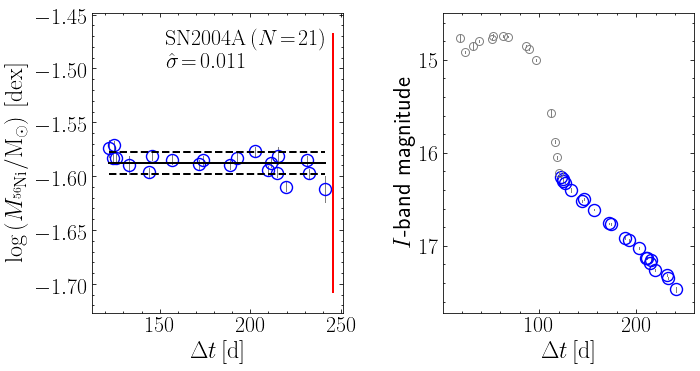

In [6]:
MNi_04A.plot('fdep=1,lc', sn='SN2004A')

In the left-hand of the figure we see that the Ni-56 mass estimates indeed seem to be consistent with a constant value (black solid line). The red vertical bar depicts the one-sigma error due to the uncertainty on distance, colour excess, explosion time, and BC. In the right-hand panel we see the apparent I-band light curve of SN 2004A and the data used to compute the Ni-56 mass estimates (blue circles).

To get the Ni-56 mass (solar mass units) in log scale, we execute

In [7]:
MNi_04A.logMNi

-1.5878075838880648

The one-sigma error is given by

In [8]:
MNi_04A.elogMNi

0.12001126670069567

To get the Ni-56 mass and its one-sigma error in solar mass units, just execute

In [9]:
MNi_04A.MNi, MNi_04A.eMNi

(0.025834045260400663, 0.007138880701676659)

Another example is SN 2014G (using the I-band photometry)

In [10]:
properties_14G = {}
properties_14G['z_helio'] = 0.0039
properties_14G['mu']  , properties_14G['err_mu']   = 31.97, 0.14
properties_14G['EGBV'], properties_14G['err_EGBV'] = 0.010, 0.002
properties_14G['EhBV'], properties_14G['err_EhBV'] = 0.268, 0.046
properties_14G['texp'], properties_14G['err_texp'] = 56669.3, 0.8
MJD_14G, I_14G, eI_14G = read_photometry('example_data/SN2014G_MJD_I')
MNi_14G = Nickel_mass('I', MJD_14G, I_14G, eI_14G, properties_14G)

30 I-band photometric points between  95.0 and 320.0 days since explosion.

Cheking constancy of the Ni-56 mass estimates...

model   bayesian   evidence   good
order   weight     ratio      fit?
-----   --------   --------   ----
0       0.000       >99       no
1       1.000       1.0       yes

It is necessary to include the deposition function (fdep)

Computing T_0...
T_0=127 days

Cheking constancy of the Ni-56 mass estimates (corrected for fdep)...

model   bayesian   evidence   good
order   weight     ratio      fit?
-----   --------   --------   ----
0       0.845       1.0       yes
1       0.155       5.5       yes

Ni-56 mass estimates are consistent with a constant value.


In this case the Ni-56 mass estimates are not consistent with a constant value, and a correction for the deposition function (fdep) is needed. Assuming the analytical expression for fdep given by 
$$f_{\mathrm{dep},i}=1+e^{-(T_0/\Delta t_i)^2},$$
the code found $T_0=127$ days. The Ni-56 mass estimates, corrected for fdep, are consistent with a constant value. Indeed, ploting both results

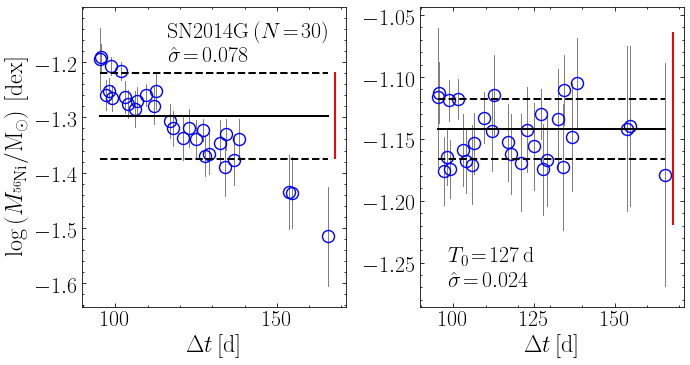

In [11]:
MNi_14G.plot('fdep=1,fdep<1', sn='SN2014G')

The Ni-56 mass and its one-sigma error (corrected for fdep) in solar mass units are

In [12]:
MNi_14G.MNi, MNi_14G.eMNi

(0.07211921975078155, 0.012839051230069766)

Finally let's see the Ni-56 mass estimates for SN 2005cs (I-band photometry)

18 I-band photometric points between 140.0 and 320.0 days since explosion.

Cheking constancy of the Ni-56 mass estimates...

model   bayesian   evidence   good
order   weight     ratio      fit?
-----   --------   --------   ----
0       0.000       >99       no
1       1.000       1.0       yes

Ni-56 mass estimates increase with time.
The deposition function is not required.


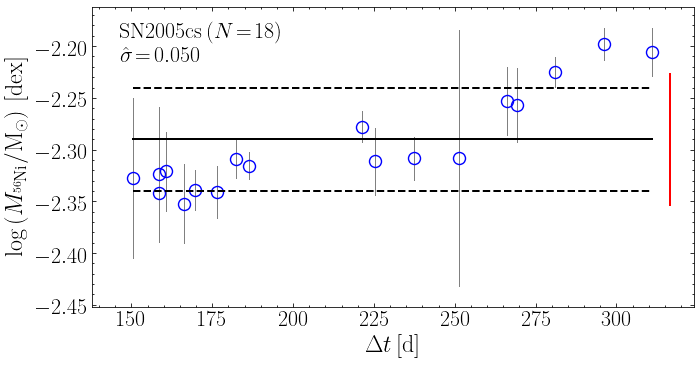

In [13]:
properties_05cs = {}
properties_05cs['z_helio'] = 0.0015
properties_05cs['mu']  , properties_05cs['err_mu']   = 29.67, 0.07 
properties_05cs['EGBV'], properties_05cs['err_EGBV'] = 0.032, 0.005
properties_05cs['EhBV'], properties_05cs['err_EhBV'] = 0.050, 0.055 
properties_05cs['texp'], properties_05cs['err_texp'] = 53548.4, 0.3 
MJD_05cs, I_05cs, eI_05cs = read_photometry('example_data/SN2005cs_MJD_I')
MNi_05cs = Nickel_mass('I', MJD_05cs, I_05cs, eI_05cs, properties_05cs, tmin=140.0)
MNi_05cs.plot('fdep=1', sn='SN2005cs')

In this case, the Ni-56 mass estimates are not consistent with a constant value. In addition, the Ni-56 estimates increases with time. The latter is not explained by a gamma-ray leakage scenario, therefore a deposition function correction is not required. The Ni-56 mass and its error (in solar mass units) for SN 2005cs are

In [14]:
MNi_05cs.MNi, MNi_05cs.eMNi

(0.005127113064870233, 0.0009516631664825855)

## 4) Warning messages
4.1) The BC calibrations implemented in the SNII_nickel code are valid for epochs in the radioactive tail within 95-320 days since the explosion. If `tmin` is lower than 95 and/or `tmax` is greater than 320, respectively, then the following warning message will be displayed 

In [15]:
MNi_05cs = Nickel_mass('I', MJD_05cs, I_05cs, eI_05cs, properties_05cs, tmin=60, tmax=400, verbose=False)

         BC calibrations are valid in the range 95-320 days since explosion.
         Consider changing the tmin and/or tmax values.


4.2) In order to detect possible gamma-ray leakage from the ejecta, the SNII_nickel code requires at least three photometric points. If less points are provided, then the Ni-56 mass estimates are computed without checking for gamma-ray leakage. For example,

In [16]:
MNi_04A = Nickel_mass('I', MJD_04A, I_04A, eI_04A, properties_04A, tmin=160, tmax=180, verbose=False)

         gamma-ray leakage cannot be checked.


4.3) The K-corrections for the VrRiI bands implemented in the SNII_nickel code are valid for z_helio<=0.043 (and for epochs in the radioactive tail within 95-320 days since the explosion). If we use z_helio>0.043, then the following warning message will be displayed 

In [17]:
properties_14G['z_helio'] = 0.05
MNi_14G = Nickel_mass('I', MJD_14G, I_14G, eI_14G, properties_14G, verbose=False)

         Consider providing K-corrected photometry to the SNII_nickel code.



If you want to compute Ni-56 masses with the SNII_nickel code for normal SNe II at redshifts higher than 0.043, then you have to apply the K-correction to your input photometry. Then, run the SNII_nickel code setting `apply_kcor=False`.